In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from backtest_functions_v2 import *

In [2]:
df = pd.read_parquet("../data/PROD_cryptonews_absa_hourly.parquet")
df.index = pd.to_datetime(df.index)
df.tail()

,news_count,tanalysis_absa,economy_absa,regulation_absa,technology_absa,adoption_absa,cybersecurity_absa
date,,,,,,,
2024-12-31 19:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 20:00:00,6,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 21:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 22:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-31 23:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN


Overall Annual Return: 100.45%
Overall Annual Sharpe Ratio: 3.0497
Maximum Drawdown: -14.75 %
Alpha: 1.0564
Beta: 0.0051

Yearly Metrics:
   year  yearly_return  yearly_std  yearly_beta  yearly_alpha  yearly_sharpe
0  2021       3.694333    0.337663     0.024302      1.583267       4.748091
1  2022       0.677812    0.242583    -0.227115      0.363241       2.254550
2  2023       0.430038    0.140934     0.182407      0.178846       2.608582
3  2024       0.435657    0.180050     0.181248      0.209112       2.098487


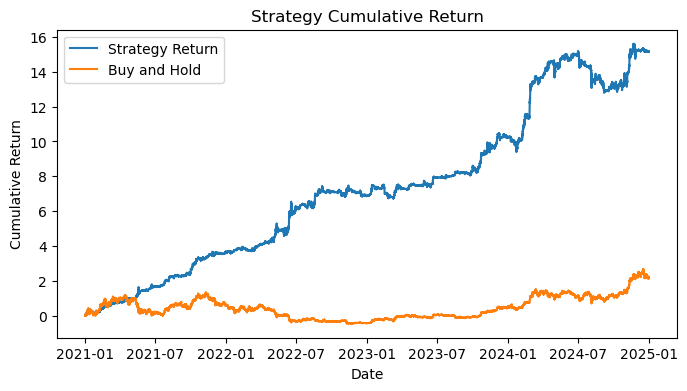

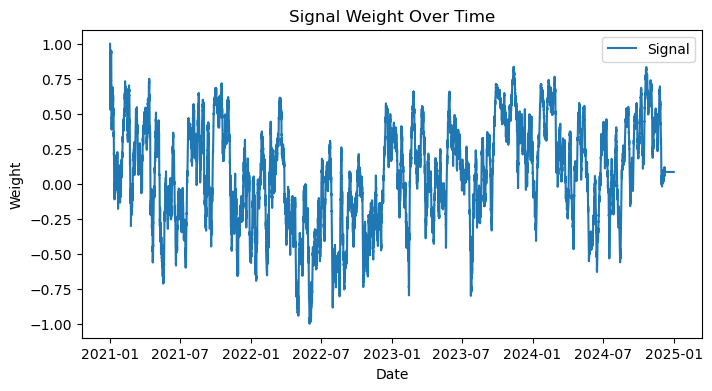

In [3]:
# signal smoothing
df['signal'] = df['tanalysis_absa'].ewm(span=100).mean()

# signal scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df['signal'] = scaler.fit_transform(df['signal'].values.reshape(-1, 1))

run_backtest(df, freq='h')